In [26]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

%matplotlib inline


## Datenfile öffnen

In [37]:
df = pd.read_csv('Journalists Killed between 1992 and 2018 - Motive Confirmed.csv')

### Wie viele Einträge hat die Datenbank?


In [38]:
df.shape

(1324, 43)

In [39]:
len (df)

1324

### Was für Datenfelder kommen darin vor?

In [40]:
df.dtypes

year                          int64
combinedStatus               object
fullName                     object
sortName                    float64
primaryNationality           object
secondaryNationality         object
tertiaryNationality         float64
gender                       object
photoUrl                     object
photoCredit                  object
type                         object
lastStatus                   object
typeOfDeath                  object
status                       object
employedAs                   object
organizations                object
jobs                         object
coverage                     object
mediums                      object
country                      object
location                     object
region                       object
state                        object
locality                     object
province                     object
localOrForeign               object
sourcesOfFire                object
motiveConfirmed             

In [41]:
df.describe()

,year,sortName,tertiaryNationality,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
count,1324.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2006.077795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.801050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1992.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Was für Datenfelder kommen darin vor?

In [42]:
df.head()

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2018,Confirmed,Abadullah Hananzai,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,Confirmed,Abay Hailu,NaN,Ethiopia,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,Confirmed,Abd al-Karim al-Ezzo,NaN,Syria,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996,Confirmed,Abdallah Bouhachek,NaN,Algeria,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,Confirmed,Abdel Aziz Mahmoud Hasoun,NaN,Syria,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.columns

Index(['year', 'combinedStatus', 'fullName', 'sortName', 'primaryNationality',
       'secondaryNationality', 'tertiaryNationality', 'gender', 'photoUrl',
       'photoCredit', 'type', 'lastStatus', 'typeOfDeath', 'status',
       'employedAs', 'organizations', 'jobs', 'coverage', 'mediums', 'country',
       'location', 'region', 'state', 'locality', 'province', 'localOrForeign',
       'sourcesOfFire', 'motiveConfirmed', 'accountabilityCrossfire',
       'accountabilityAssignment', 'impunityMurder', 'tortured', 'captive',
       'threatened', 'charges', 'motive', 'lengthOfSentence', 'healthProblems',
       'impCountry', 'entry', 'sentenceDate', 'sentence',
       'locationImprisoned'],
      dtype='object')

In [131]:
df["country"].value_counts().sort_values(ascending=False).head(5)

Iraq           186
Syria          123
Philippines     80
Somalia         64
Algeria         60
Name: country, dtype: int64

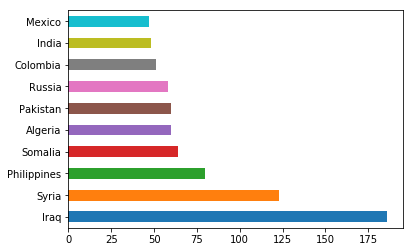

In [71]:
df['country'].value_counts().head(10).plot(kind='barh')

In [55]:
df["primaryNationality"].value_counts()

Iraq                                             159
Syria                                            110
Philippines                                       80
Pakistan                                          58
Algeria                                           58
Russia                                            55
Somalia                                           52
Colombia                                          49
India                                             48
Mexico                                            45
Brazil                                            40
Afghanistan                                       28
Turkey                                            21
Bangladesh                                        20
Sri Lanka                                         19
Yemen                                             19
Tajikistan                                        17
Rwanda                                            17
Israel and the Occupied Palestinian Territory 

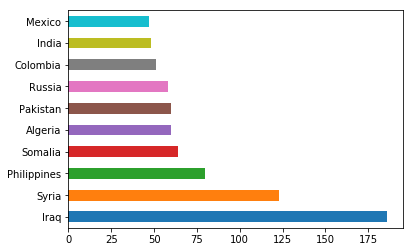

In [72]:
df['country'].value_counts().head(10).plot(kind='barh')

In [46]:
df['localOrForeign'].value_counts()

Local      1165
Foreign     159
Name: localOrForeign, dtype: int64

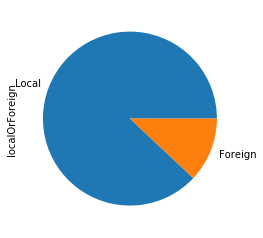

In [74]:
df['localOrForeign'].value_counts().head(10).plot(kind='pie')

In [48]:
df['gender'].value_counts()

Male      1230
Female      93
Name: gender, dtype: int64

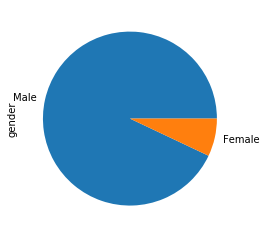

In [75]:
df['gender'].value_counts().head(10).plot(kind='pie')

In [50]:
df['organizations'].value_counts()

Freelance                           86
freelance                           48
Freelancer                          21
Reuters                             12
Al-Jazeera                           8
Al-Iraqiya                           8
Ozgur Gundem                         8
Algerian State Television            8
Baghdad TV                           8
Al-Arabiya                           7
Samaa TV                             6
Shaam News Network                   6
Kurdistan TV                         6
Al-Sharqiya                          6
Radio Shabelle                       6
Al-Shaabiya                          5
Al-Ikhbariya                         5
Salaheddin TV                        5
Periodico Ini                        5
Shabelle Media Network               5
BBC                                  5
Eenadu Television (E-TV)             5
Orient News                          4
Charlie Hebdo                        4
Capital Gazette                      4
Novaya Gazeta            

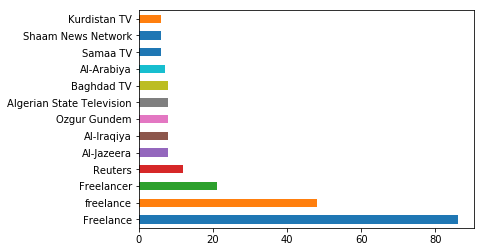

In [77]:
df['organizations'].value_counts().head(13).plot(kind='barh')

In [127]:
df.groupby('country')['year'].value_counts()

country      year
Afghanistan  2018    12
             2001     9
             2016     4
             2017     4
             2006     3
             2014     3
             2007     2
             2008     2
             2009     2
             2010     2
             2011     2
             1994     1
             1998     1
Algeria      1995    24
             1994    18
             1993     8
             1996     7
             2001     2
             1992     1
Angola       1993     3
             2010     2
             1992     1
             1994     1
             1995     1
             1996     1
             1998     1
Argentina    1997     1
             1999     1
Azerbaijan   1992     1
             1995     1
                     ..
USA          2015     2
             1992     1
             1993     1
             2007     1
Uganda       2002     1
             2010     1
Ukraine      2014     5
             1995     1
             1996     1
             1997     

In [68]:
df.groupby('country')['typeOfDeath'].value_counts()

country                   typeOfDeath         
Afghanistan               Murder                  23
                          Crossfire               12
                          Dangerous Assignment    12
Algeria                   Murder                  58
                          Dangerous Assignment     2
Angola                    Murder                   7
                          Crossfire                2
                          Dangerous Assignment     1
Argentina                 Murder                   2
Azerbaijan                Crossfire                2
                          Murder                   2
                          Dangerous Assignment     1
Bahrain                   Dangerous Assignment     3
Bangladesh                Murder                  19
                          Dangerous Assignment     2
Belarus                   Murder                   2
Bolivia                   Dangerous Assignment     1
                          Murder                   1

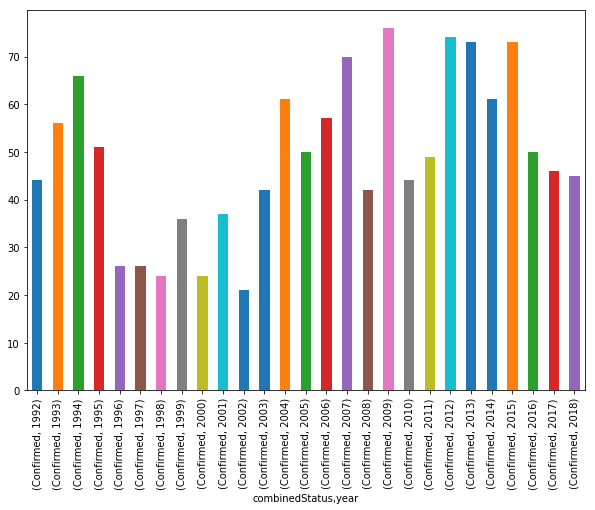

In [83]:
df.groupby('combinedStatus')['year'].value_counts().sort_index().plot(kind="bar", figsize=(10,7))

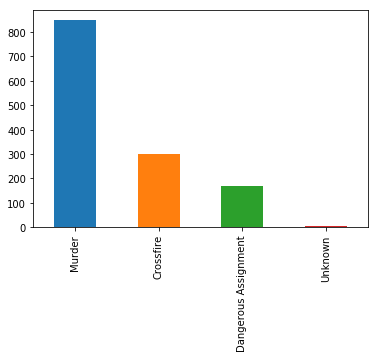

In [85]:
df['typeOfDeath'].value_counts().head().plot(kind='bar')

In [100]:
df2 = pd.read_excel('InhaftiereJournis_korr.xlsx')

In [101]:
df2.shape

(18, 81)

In [102]:
len(df2)

18

In [103]:
df2.describe()

,jahr,anzahl total,afghanistan,algerien,armenien,aserbaidschan,bahrain,burkina faso,bangladesch,weissrussland,...,jemen,israel,swasiland,turkmenistan,sambia,ukraine,venezuela,VAE,panama,uganda
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2008.500000,164.055556,0.166667,1.222222,0.166667,4.166667,1.722222,0.055556,1.555556,0.222222,...,0.388889,1.944444,0.055556,0.166667,0.055556,0.055556,0.166667,0.055556,0.055556,0.444444
std,5.338539,53.515773,0.383482,1.262843,0.383482,3.884358,2.515962,0.235702,1.580105,0.732084,...,0.697802,2.436782,0.235702,0.383482,0.235702,0.235702,0.383482,0.235702,0.235702,1.885618
min,2000.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.250000,125.500000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.500000,138.500000,0.000000,1.500000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.750000,208.000000,0.000000,2.000000,0.000000,8.000000,2.750000,0.000000,2.750000,0.000000,...,0.750000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,262.000000,1.000000,4.000000,1.000000,10.000000,7.000000,1.000000,5.000000,3.000000,...,2.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [105]:
df2.head(18)

,jahr,anzahl total,afghanistan,algerien,armenien,aserbaidschan,bahrain,burkina faso,bangladesch,weissrussland,...,jemen,israel,swasiland,turkmenistan,sambia,ukraine,venezuela,VAE,panama,uganda
0,2000,81,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,118,0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2002,139,0,2,0,0,0,0,4,3,...,0,0,0,0,0,0,0,0,0,0
3,2003,138,0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2004,122,0,4,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,2005,125,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006,134,0,2,1,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,2007,127,0,2,1,9,0,0,3,0,...,0,2,0,0,0,0,0,0,0,0
8,2008,125,1,0,1,5,0,0,1,0,...,0,4,0,0,0,0,0,0,0,0
9,2009,136,0,0,0,6,0,0,0,0,...,2,0,0,0,0,0,1,0,0,0


In [106]:
df2["türkei"]

0     14
1     13
2     13
3      5
4      1
5      1
6      1
7      0
8      0
9      1
10     4
11     8
12    49
13    40
14     7
15    14
16    81
17    73
Name: türkei, dtype: int64

In [114]:
df2.groupby('jahr')['türkei'].value_counts()

jahr  türkei
2000  14        1
2001  13        1
2002  13        1
2003  5         1
2004  1         1
2005  1         1
2006  1         1
2007  0         1
2008  0         1
2009  1         1
2010  4         1
2011  8         1
2012  49        1
2013  40        1
2014  7         1
2015  14        1
2016  81        1
2017  73        1
Name: türkei, dtype: int64

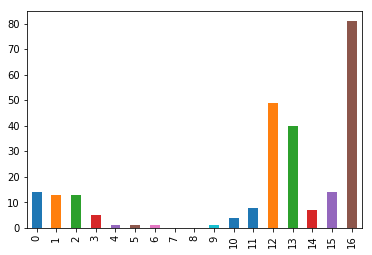

In [125]:
df2['türkei'].head(17).plot(kind='bar')

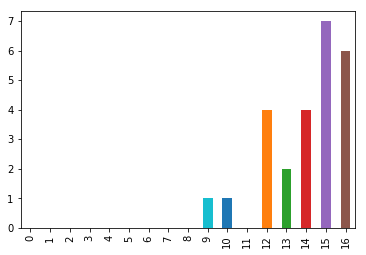

In [126]:
df2['saudi arabien'].head(17).plot(kind='bar')

In [133]:
df["country"].value_counts().sort_values(ascending=False).head(5)

Iraq           186
Syria          123
Philippines     80
Somalia         64
Algeria         60
Name: country, dtype: int64

In [135]:
liste = df.groupby('year')['country'].value_counts()

In [137]:
path = "journis.csv"

liste.to_csv(path, index=True)

In [138]:
df3 = pd.read_csv('Journalists Missing between 1992 and 2018.csv')

In [139]:
df3.shape

(680, 43)

In [140]:
df3.head()

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2003,Missing,Acquitté Kisembo,NaN,NaN,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,Missing,Acquitté Kisembo,NaN,NaN,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Missing,Acquitté Kisembo,NaN,NaN,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006,Missing,Acquitté Kisembo,NaN,NaN,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,Missing,Acquitté Kisembo,NaN,NaN,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
df.columns

Index(['year', 'combinedStatus', 'fullName', 'sortName', 'primaryNationality',
       'secondaryNationality', 'tertiaryNationality', 'gender', 'photoUrl',
       'photoCredit', 'type', 'lastStatus', 'typeOfDeath', 'status',
       'employedAs', 'organizations', 'jobs', 'coverage', 'mediums', 'country',
       'location', 'region', 'state', 'locality', 'province', 'localOrForeign',
       'sourcesOfFire', 'motiveConfirmed', 'accountabilityCrossfire',
       'accountabilityAssignment', 'impunityMurder', 'tortured', 'captive',
       'threatened', 'charges', 'motive', 'lengthOfSentence', 'healthProblems',
       'impCountry', 'entry', 'sentenceDate', 'sentence',
       'locationImprisoned'],
      dtype='object')

In [154]:
df3["year"(2018)].value_counts().sort_values(ascending=False).head(5)

TypeError: 'str' object is not callable